In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run load_data.ipynb  

In [3]:
data = load_processed_data()

In [9]:
data.sample(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_latitude,end_station_longitude,start_hour,end_hour,distance,day_of_week,day_name,month,month_name,year
44584,2019-06-21 12:17:02.495000+00:00,2019-06-21 12:27:35.135000+00:00,632,289,Castle Street,Near Rose Street,55.951501,-3.203184,248,Bristo Square,...,55.946004,-3.188665,12,12,1094.192989,4,Friday,6,June,2019
134062,2020-02-10 08:39:45.040000+00:00,2020-02-10 08:47:17.695000+00:00,452,1090,Hillside Crescent,East end of Hillside Crescent,55.957872,-3.175888,1743,Logie Green Road,...,55.964058,-3.195700,8,8,1416.167362,0,Monday,2,February,2020
66579,2019-08-12 18:41:45.187000+00:00,2019-08-12 18:50:36.796000+00:00,531,881,Tollcross,Outside Piccolino,55.944281,-3.202964,349,Orchard Brae House,...,55.955083,-3.223634,18,18,1764.665640,0,Monday,8,August,2019
130867,2020-02-01 11:12:15.857000+00:00,2020-02-01 11:25:07.757000+00:00,771,1745,Scotland Street,Corner with Royal Crescent,55.960380,-3.195470,1753,Waitrose Comely Bank,...,55.959536,-3.223434,11,11,1749.082099,5,Saturday,2,February,2020
147636,2020-03-15 15:33:24.367000+00:00,2020-03-15 15:44:31.695000+00:00,667,249,Fountainbridge,Fountainbridge by Gardner's Crescent,55.943357,-3.209248,1017,Crichton Street,...,55.944784,-3.186906,15,15,1404.962485,6,Sunday,3,March,2020


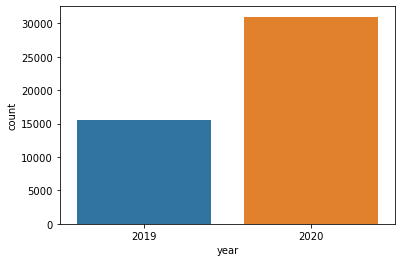

In [25]:
%matplotlib inline
sns.countplot(x="year", data=data[data.month <= 3])

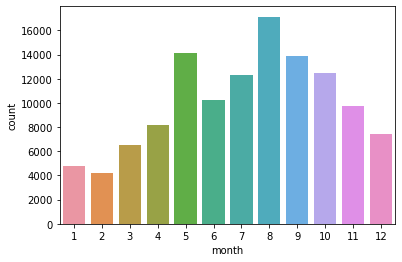

In [22]:
%matplotlib inline
sns.countplot(x="month", data=data[data.year == 2019])

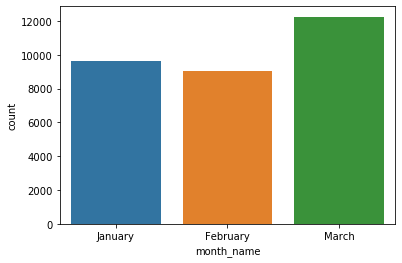

In [24]:
%matplotlib inline
sns.countplot(x="month_name", data=data[data.year == 2020])

In [23]:
data.start_station_name.value_counts()[0:20]

Bristo Square          7320
Meadows East           6368
St Andrew Square       6152
Castle Street          4372
Canonmills             3958
Dundee Terrace         3848
Fountainbridge         3820
George Square          3714
Pollock Halls          3692
Charlotte Square       3685
Meadow Place           3592
Portobello             3421
Victoria Quay          3392
Waverley Bridge        3260
Castle Terrace         3000
Lauriston Place        2844
City Chambers          2771
Dudley Gardens         2563
Warrender Park Road    2539
Leith Walk             2340
Name: start_station_name, dtype: int64

In [36]:
data_daily = data.groupby(["date"]).started_at.count()

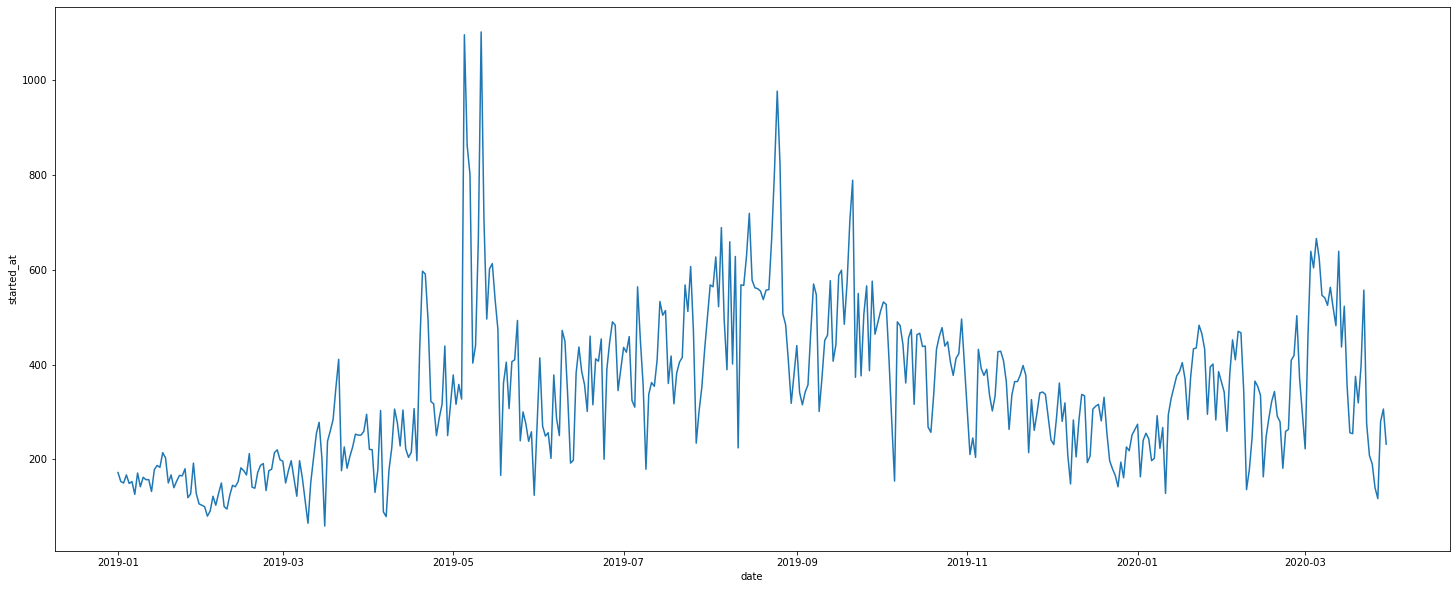

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.lineplot(x=data_daily.index, y=data_daily, ax=ax)